#Table of Contents
* [1. Introduction](#1.-Introduction)
	* [1.1 ROOT TCanvas](#1.1-ROOT-TCanvas)
	* [1.2 A simple TGraph with Error bars](#1.2-A-simple-TGraph-with-Error-bars)
	* [1.3 Include TCanvas in IPython notebook](#1.3-Include-TCanvas-in-IPython-notebook)
* [2. Fit](#2.-Fit)
	* [2.1 binned likelihood method](#2.1-binned-likelihood-method)
* [3. Optimal Bin size: guidelines and rules of thumb](#3.-Optimal-Bin-size:-guidelines-and-rules-of-thumb)
	* [3.1 New Histogram using the Optimal bin size](#3.1-New-Histogram-using-the-Optimal-bin-size)
	* [3.2 Fit](#3.2-Fit)
	* [3.3 Moving to 2D distributions](#3.3-Moving-to-2D-distributions)
	* [3.4 Projections on X and Y axis](#3.4-Projections-on-X-and-Y-axis)
* [4. Further reading about ROOT](#4.-Further-reading-about-ROOT)


# 1. Introduction

In [1]:
import array
import numpy as np

In [2]:
from ROOT import gROOT
from ROOT import TCanvas, TGraphErrors, TH1F, TH2F
from ROOT import gPad

NB: 
in addition to the PyROOT bindings introduced in ROOT, there is also a more pythonic interface with ROOT: **[rootpy](http://www.rootpy.org/index.html)**
   - This is a community-driven initiative interesting to follow 

## 1.1 ROOT TCanvas

In [3]:
gROOT.Reset()
c1 = TCanvas( 'c1', 'A Simple Graph with error bars', 200, 10, 700, 500 )
c1.SetGrid()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 12 )


## 1.2 A simple TGraph with Error bars

In [4]:
from array import array

n = 10;
x  = array( 'f', [ -0.22, 0.05, 0.25, 0.35,  0.5, 0.61,  0.7, 0.85, 0.89, 0.95 ] )
ex = array( 'f', [  0.05,  0.1, 0.07, 0.07, 0.04, 0.05, 0.06, 0.07, 0.08, 0.05 ] )
y  = array( 'f', [     1,  2.9,  5.6,  7.4,  9.0,  9.6,  8.7,  6.3,  4.5,    1 ] )
ey = array( 'f', [  0.8,  0.7,  0.6,  0.5,  0.4,  0.4,  0.5,  0.6,  0.7,  0.8  ] )

#ROOT TGRAPH
gr = TGraphErrors( n, x, y, ex, ey )
gr.SetTitle( 'TGraphErrors Example' )
gr.SetMarkerColor( 4 )
gr.SetMarkerStyle( 21 )
gr.Draw( 'ALP' )

## 1.3 Include TCanvas in IPython notebook

In [5]:
print open('rootdisplay.py').read()

"""
Helper module for displaying ROOT pad in ipython notebooks

@author domenico.giordano@cern.ch

This is an adaptation of the helper developed by
alexander.mazurov@cern.ch
andrey.ustyuzhanin@cern.ch
Ref: http://mazurov.github.io/webfest2013/

Usage example:
    # Save this file as rootdisplay.py to your working directory.
    
    import rootnotes
    c1 = TCanvas("c1")
    fun1 = TF1( 'fun1', 'abs(sin(x)/x)', 0, 10)
    fun1.Draw()
    c1.display()
"""


import tempfile
from IPython.core import display
from ROOT import gPad, TPad, TCanvas
from ROOT import TIter, gROOT

def ROOTIPythonDisplay(self,figFormat='svg'):
    file = tempfile.NamedTemporaryFile(suffix=".%s"%(figFormat))
    self.SaveAs(file.name)
    img = 'Allowed formats are svg, jpg, png'
    if figFormat == 'svg':
        img = display.SVG(filename=file.name)
    elif figFormat == 'jpg' or figFormat == 'png':
        img = display.Image(filename=file.name, embed=True)
    file.close()
    return img

TPad.display = ROOTI

In [4]:
import rootdisplay

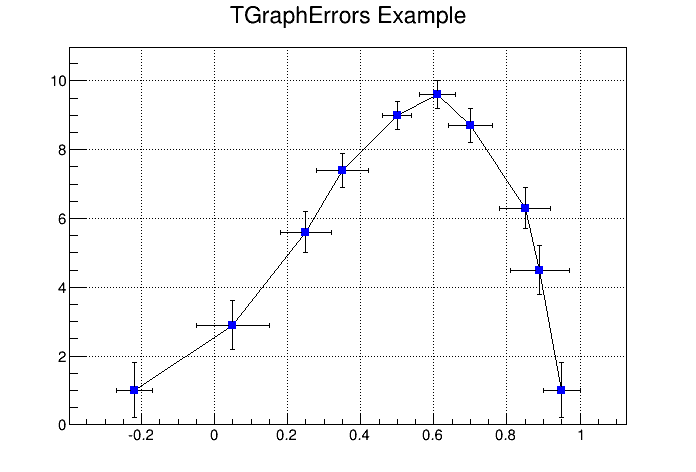

In [10]:
c1.display("png")

In [11]:
np.random.seed(1234)
nx= np.random.normal(5,1,100)

In [12]:
h = TH1F('h','h',100,0,10)
for x in nx:
    h.Fill(x)
h.Draw()

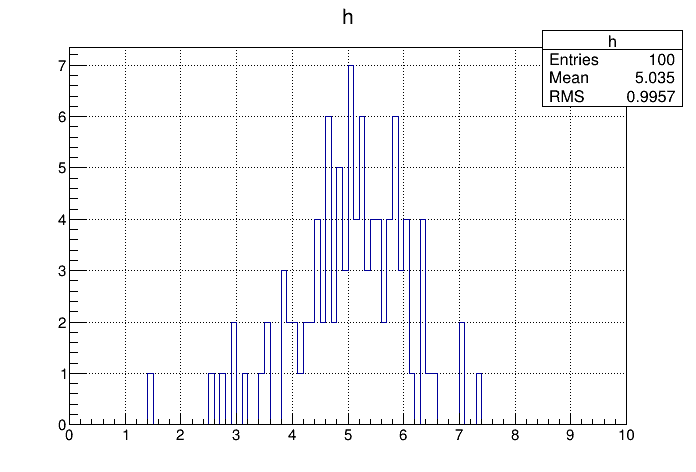

In [13]:
c1.display("png")

# 2. Fit

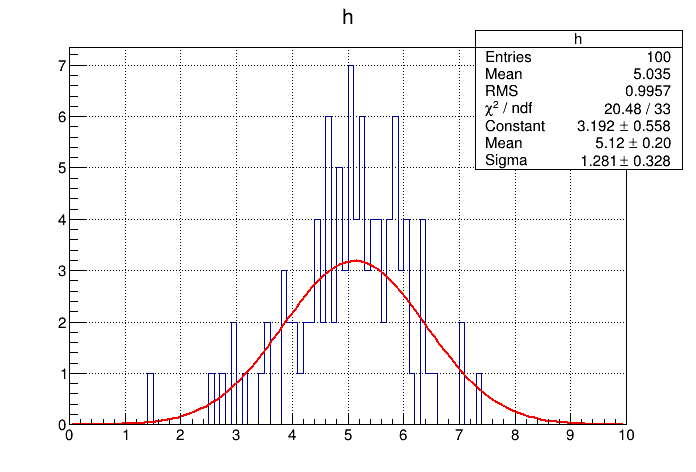

In [15]:
gPad.display("png")

In [16]:
f = h.GetFunction("PrevFitTMP")
print f.GetChisquare()
print f.GetParameter("Constant")
print f.GetParameter("Mean")
print f.GetParameter("Sigma")

20.4804563711
3.1924723688
5.1196458358
1.28073110382


## 2.1 binned likelihood method

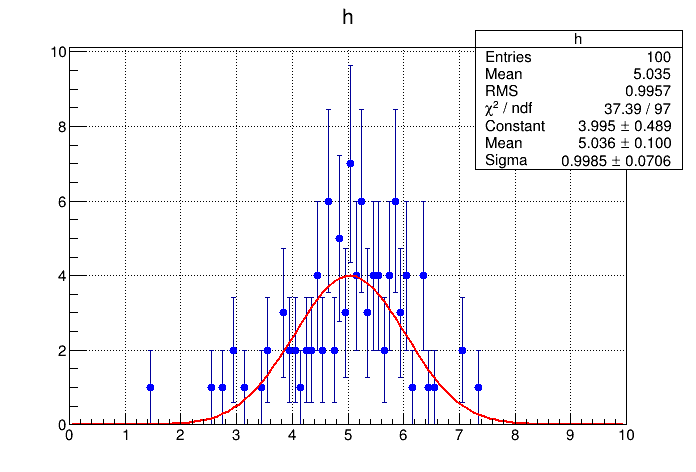

In [20]:
c1.display(figFormat="png")

# 3. Optimal Bin size: guidelines and rules of thumb

http://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width

Is there a way to determine the "best" number of bins for an histogram? 

   * low number of entries: wider bins => reduces noise due to sampling randomness; 
   * high number of entries: narrower bins => greater precision to the density estimation. 

Depending on the actual data distribution and the goals of the analysis, different bin widths may be appropriate

Many methods to determine an optimal number of bins, generally make strong assumptions about the shape of the distribution. 

We will use the **Freedman–Diaconis rule**

bin_size $= 2 \frac{IQR(x)}{n^{1/3}} $

In [18]:
def getOptimalBinSize(data):
    qtl = np.percentile(data,[25,75])
    h = -2. * np.subtract(*qtl)/np.power(len(list(data)),1./3.)
    print 'bin size %s' %h
    return h

In [19]:
Nbins = int(10./getOptimalBinSize(nx))
Nbins = 15

bin size 0.515919568738


## 3.1 New Histogram using the Optimal bin size

In [21]:
c2 = TCanvas('c2')
h2 = TH1F('h2','h2',Nbins,0,10)

In [22]:
for x in nx:
    h2.Fill(x)

In [23]:
h2.SetMarkerStyle(23)
h2.Draw("E1")

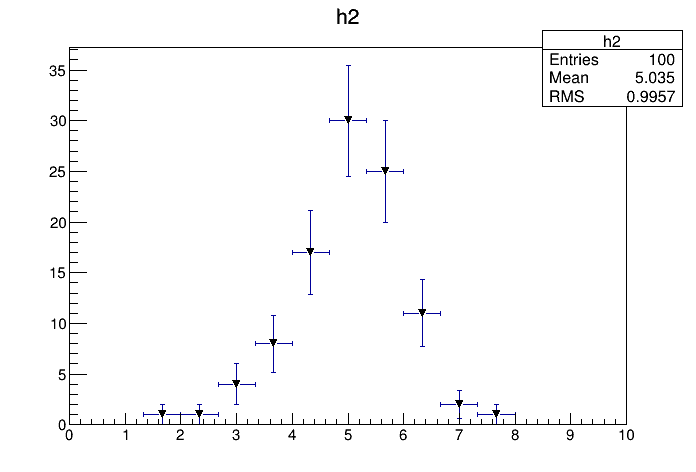

In [24]:
gPad.display("png")

## 3.2 Fit

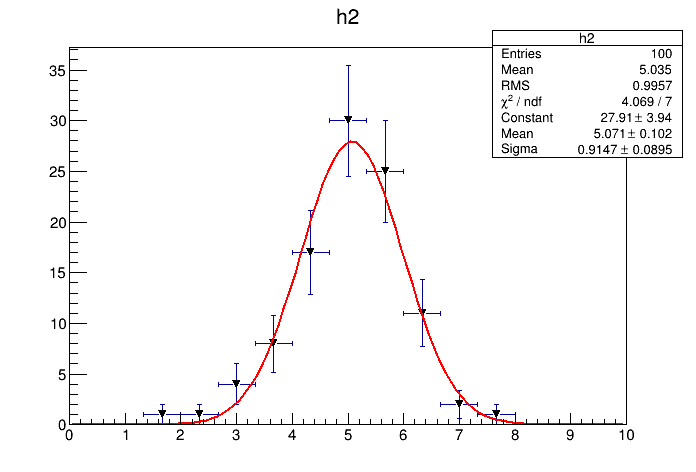

In [25]:
gPad.display("png")

## 3.3 Moving to 2D distributions

In [5]:
np.random.seed(1234)
h2D = TH2F("h2D","h2D",100,0,10.,100,0,10.)
for i in xrange(0,10000):
    val = np.random.normal(5.,1.,2)
    h2D.Fill(val[0],val[1])

In [6]:
h2D.Draw("box")

In [7]:
gPad.display("png")

## 3.4 Projections on X and Y axis

In [8]:
c4 = TCanvas("c4","c4")
c4.Divide(2,2)
c4.cd(1)
h2D.Draw("box")
c4.cd(2)
h2D_py = h2D.ProjectionY()
h2D_py.SetTitle('py')
h2D_py.Draw()
c4.cd(3)
h2D_px = h2D.ProjectionX()
h2D_px.SetTitle('px')
h2D_px.Draw()
c4.cd(4)
h2D_profX = h2D.ProfileX()
h2D_profX.SetTitle('px')
h2D_profX.Draw()
c4.Draw()

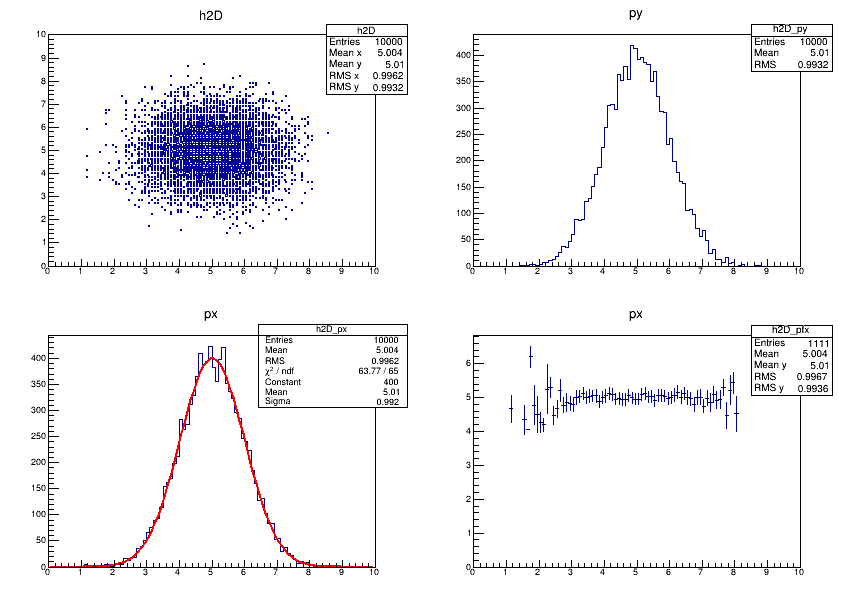

In [9]:
c4.display(figFormat="png")

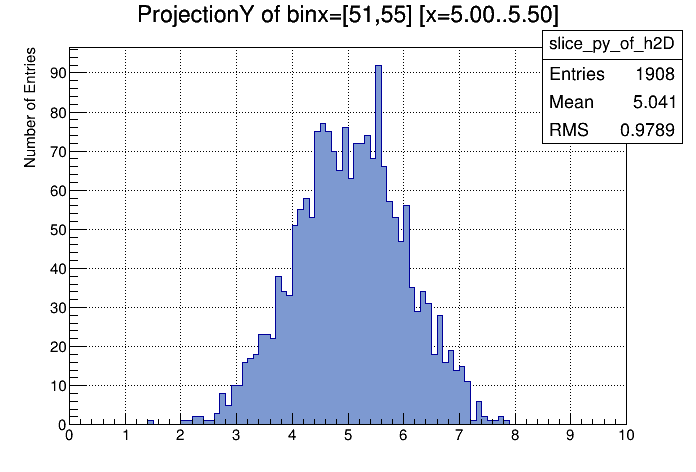

In [30]:
from rootdisplay import FindCanvas
d=FindCanvas(title="c4")
d.display(figFormat="png")

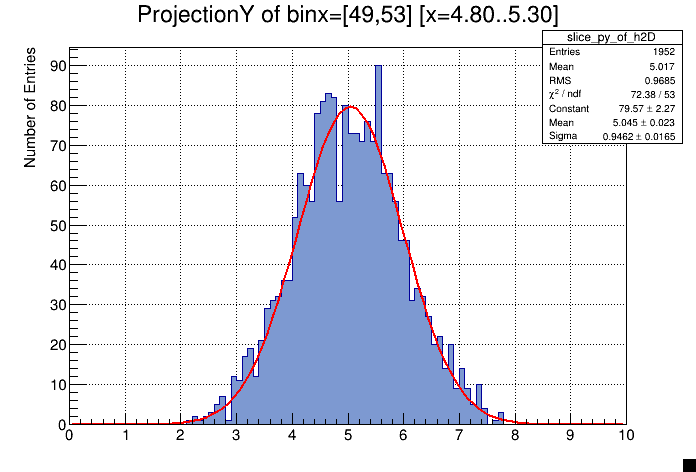

In [31]:
d.display(figFormat="png")

In [56]:
# gROOT.GetListOfCanvases().ls()

In [35]:
np.random.seed(12345)
for i in xrange(0,10000):
    val = np.random.normal(3.,.5,2)
    h2D.Fill(val[0],val[1])

In [37]:
c4 = TCanvas("c4")
c4.Divide(2,2)

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c4


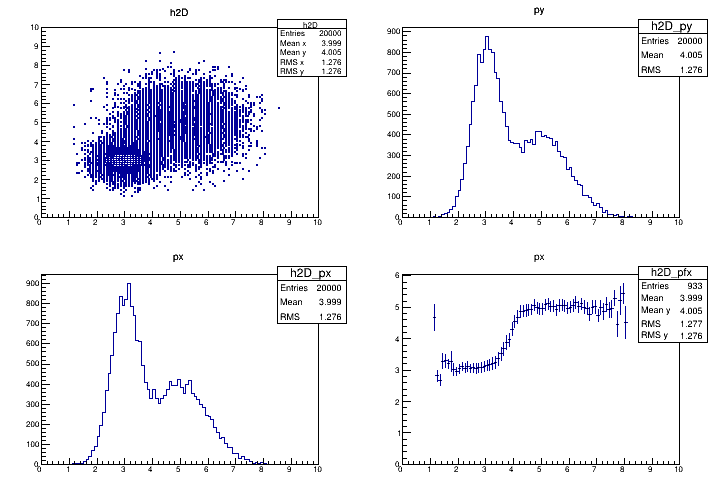

In [38]:
c4.cd(1)
h2D.Draw("box")
c4.cd(2)
h2D_py = h2D.ProjectionY()
h2D_py.SetTitle('py')
h2D_py.Draw()
c4.cd(3)
h2D_px = h2D.ProjectionX()
h2D_px.SetTitle('px')
h2D_px.Draw()
c4.cd(4)
h2D_profX = h2D.ProfileX()
h2D_profX.SetTitle('px')
h2D_profX.Draw()
c4.Draw()
c4.display(figFormat="png")

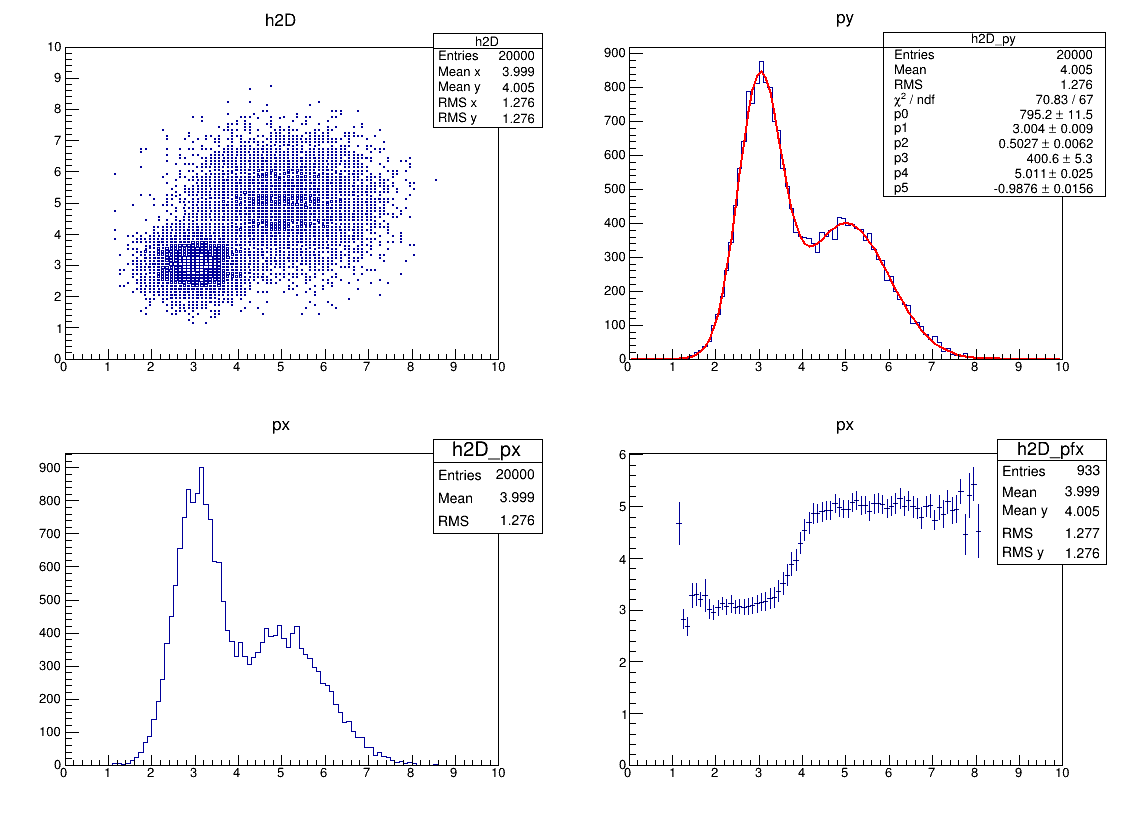

In [39]:
c4.display("png")

# 4. Further reading about ROOT

- ROOT full [documentation](https://root.cern.ch/drupal/content/documentation)
- ROOT [tutorials](https://root.cern.ch/root/html/tutorials/)
- [Fit examples](http://polywww.in2p3.fr/activites/physique/glast/workbook/pages/advanced_GRUG/hist_fit.pdf)